# Kobe Bryant Shot Selection

Soon after Kobe retired in 2016, [Kaggle](https://www.kaggle.com/c/kobe-bryant-shot-selection/overview) released a dataset containing 20 years of his field goal attempts. Using this data, we will build a model that can predict which shots will hit the bottom of the net. 

## Undestanding the dataset
So far, we know that the *shot_made_flag* field is our target variable and has a value of 1 if Kobe made the shot, and 0 if he missed the shot. Everything else will need to be explored.

In [35]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline
import seaborn as sns
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

In [36]:
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [37]:
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


Let's drop the rows where *shot_made_flag* has null values since they won't be useful in training or testing.

In [38]:
data.isnull().values.any()

True

In [39]:
data['shot_made_flag'].isnull().sum()

5000

In [40]:
data = data.dropna(subset=['shot_made_flag'])
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


Let's combine the *minutes_remaining* and *seconds_remaining* fields into a new column *time_remaining*.

In [41]:
data.insert(len(data.columns), 'time_remaining',
           Series(data.minutes_remaining*60 + data.seconds_remaining))
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   game_event_id       25697 non-null  int64  
 3   game_id             25697 non-null  int64  
 4   lat                 25697 non-null  float64
 5   loc_x               25697 non-null  int64  
 6   loc_y               25697 non-null  int64  
 7   lon                 25697 non-null  float64
 8   minutes_remaining   25697 non-null  int64  
 9   period              25697 non-null  int64  
 10  playoffs            25697 non-null  int64  
 11  season              25697 non-null  object 
 12  seconds_remaining   25697 non-null  int64  
 13  shot_distance       25697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           25697 non-null  object 
 16  shot

Let's investigate some of the distinct values of the categorical fields.

In [42]:
print(data.combined_shot_type.unique())
print(data.action_type.unique())
print(data.shot_type.unique())

['Jump Shot' 'Dunk' 'Layup' 'Tip Shot' 'Hook Shot' 'Bank Shot']
['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Shot'
 'Running Bank shot' 'Driving B

It appears *action_type* is a more specific categorization of *combined_shot_type*.

Let's look at the court variables.

In [43]:
print(data.shot_zone_area.unique())
print(data.shot_zone_basic.unique())
print(data.shot_zone_range.unique())

['Left Side(L)' 'Left Side Center(LC)' 'Right Side Center(RC)' 'Center(C)'
 'Right Side(R)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']
['8-16 ft.' '16-24 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']


The first two fields are area categorizations while the third is distance from the basket.

## Data visualization
We will visualize the data using *loc_x*, *loc_y*, *lon*, and *lat* since they identify the coordinates of each attempt. We will use blue for a make (*shot_made_flag == 1*) and red for a miss.

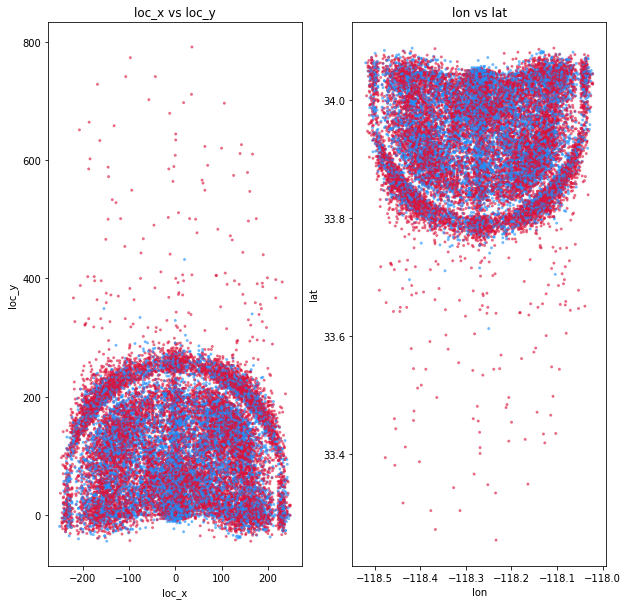

In [44]:
plt.figure(figsize=(10,10))

#Assign blue to a make and red to a miss

colors = np.where(data['shot_made_flag']==1, "Dodgerblue", "Crimson");
colors.shape

#Our subplots will have a marker of size=4 and transparency of 50%

plt.subplot(121)
plt.title('loc_x vs loc_y')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
plt.scatter(data.loc_x, data.loc_y, color=colors, s=4, alpha=0.5)

plt.subplot(122)
plt.title('lon vs lat')
plt.xlabel('lon')
plt.ylabel('lat')
plt.scatter(data.lon, data.lat, color=colors, s=4, alpha=0.5)

We notice the two plots appear to be mirrored. 

Let's check whether the area-related fields signify different areas of the court and map them. We will use the Pandas *groupby* utility to group by *shot_zone_area*. We can then iterate on the groupby dataframe by the column we used to group items on and the rest of the dataframe. The following block will show us the different values of the column we grouped by, and the length of each corresponding division in the rest of the dataframe.

In [45]:
groups = data.groupby('shot_zone_range')
for column, frame in groups:
    print('columns:{0}, frame:{1}'.format(column, len(frame)))

columns:16-24 ft., frame:6907
columns:24+ ft., frame:5281
columns:8-16 ft., frame:5580
columns:Back Court Shot, frame:72
columns:Less Than 8 ft., frame:7857


Next, let's define a method that takes any of the area features as an input and groups by the given feature. This will create a linspace of equally spaced points that can be used to pick a color for a colormap for each of the groups. 

In [46]:
np.linspace(0, 1, len(groups))

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

<Figure size 360x720 with 0 Axes>

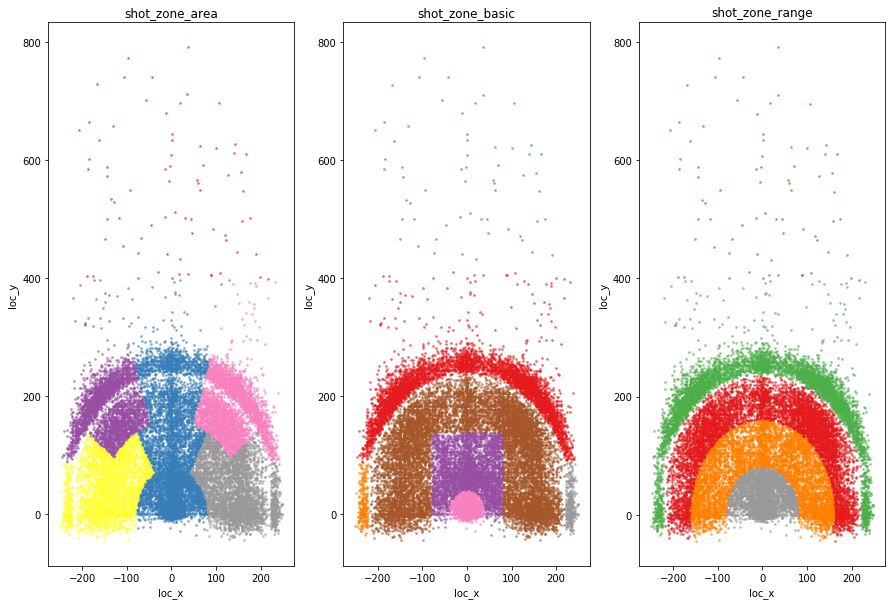

In [47]:
import matplotlib.cm as cm
plt.figure(figsize=(5,10))

def grouped_plot(feature):
    groups = data.groupby(feature)
    colors = cm.Set1(np.linspace(0, 1, len(groups)))
    for g, c in zip(groups, colors):
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, s=3, alpha=0.5)
        
plt.figure(figsize=(15,10))

plt.subplot(131)
plt.title('shot_zone_area')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
grouped_plot('shot_zone_area')

plt.subplot(132)
plt.title('shot_zone_basic')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
grouped_plot('shot_zone_basic')

plt.subplot(133)
plt.title('shot_zone_range')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
grouped_plot('shot_zone_range')

### Looking for relationships
Let's look at the effect of categorical variables on making a shot by making density plots.
The first plot will show the distribution of makes by *shot_zone_range*.

In [48]:
zones = data['shot_zone_range'].value_counts()
zones = list(zones.index)

for zone_range in zones:
     # Select the zone_range
    subset = data[data['shot_zone_range'] == zone_range]
    print(subset['shot_made_flag'].value_counts(normalize=True) * 100)
print(data['shot_zone_range'].unique())

1.0    57.311951
0.0    42.688049
Name: shot_made_flag, dtype: float64
0.0    59.823368
1.0    40.176632
Name: shot_made_flag, dtype: float64
0.0    56.451613
1.0    43.548387
Name: shot_made_flag, dtype: float64
0.0    66.748722
1.0    33.251278
Name: shot_made_flag, dtype: float64
0.0    98.611111
1.0     1.388889
Name: shot_made_flag, dtype: float64
['8-16 ft.' '16-24 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']


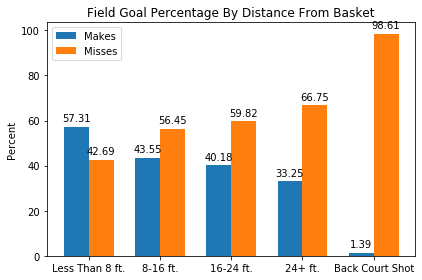

In [49]:
labels = ['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.', 'Back Court Shot']
makes = [57.31, 43.55, 40.18, 33.25, 1.39]
misses = [42.69, 56.45, 59.82, 66.75, 98.61]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, makes, width, label='Makes')
rects2 = ax.bar(x + width/2, misses, width, label='Misses')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Field Goal Percentage By Distance From Basket')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

As expected, his field goal percentage decreases the further he gets away from the basket. Distance doesn't tell the whole story, so let's see how his field goal percentage distributes by shot type.

In [50]:
zones = data['combined_shot_type'].value_counts()
zones = list(zones.index)

for shot_type in zones:
     # Select the zone_range
    subset = data[data['combined_shot_type'] == shot_type]
    print(subset['shot_made_flag'].value_counts(normalize=True) * 100)
print(data['combined_shot_type'].unique())

0.0    60.892948
1.0    39.107052
Name: shot_made_flag, dtype: float64
1.0    56.509267
0.0    43.490733
Name: shot_made_flag, dtype: float64
1.0    92.80303
0.0     7.19697
Name: shot_made_flag, dtype: float64
0.0    65.131579
1.0    34.868421
Name: shot_made_flag, dtype: float64
1.0    53.543307
0.0    46.456693
Name: shot_made_flag, dtype: float64
1.0    79.166667
0.0    20.833333
Name: shot_made_flag, dtype: float64
['Jump Shot' 'Dunk' 'Layup' 'Tip Shot' 'Hook Shot' 'Bank Shot']


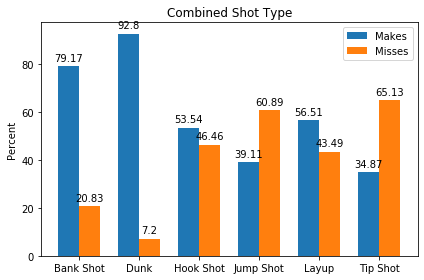

In [51]:
labels = ['Bank Shot', 'Dunk', 'Hook Shot', 'Jump Shot', 'Layup', 'Tip Shot']
makes = [79.17, 92.80, 53.54, 39.11, 56.51, 34.87]
misses = [20.83, 7.20, 46.46, 60.89, 43.49, 65.13]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, makes, width, label='Makes')
rects2 = ax.bar(x + width/2, misses, width, label='Misses')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Combined Shot Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

As we noted earlier, *action_type* is a more specific catergorization of *combined_shot_type*, so we can expect it to be a good candidate for our predicitive model.

## Modeling with a decision tree
We will use a decision tree for our model. We will use entropy as our criterion for splitting.

### Pre-processing
**Cleaning the dataset**
Let's drop all lines where our target variable is NaN.

In [52]:
data = data.dropna()
data.index = range(len(data))
print(data.shape)
data.isnull().values.any()

(25697, 26)


False

Let's begin with examining any features dealing with time.
- *game_date* may capture performance variablity based on the point of the season.
- We'll separate *game_date* into month and year.
- *Season* might help us factor in age into a player's performance.
- We'll use *time_remaining*, which is in seconds, and drop *seconds* and *minutes_remaining*.
We'll also drop *shot_id*, *game_id*, and *team_name* as it is always the Lakers.

In [53]:
data.loc[:,'month'] = data['game_date'].str[5:7].astype(int)
data.loc[:,'year'] = data['game_date'].str[0:4].astype(int)
data = data.drop('team_name', 1)
data = data.drop('shot_id', 1)
data = data.drop('game_id', 1)
data = data.drop('game_event_id', 1)
data = data.drop('game_date', 1)
data = data.drop('season', 1)
time = Series(data.minutes_remaining*60 + data.seconds_remaining)
data.loc[:, 'time_remaining'] = time
data = data.drop('seconds_remaining', 1)
data = data.drop('minutes_remaining', 1)


Whether a game is home or away may affect his shot, so let's create a series with 1s where there is 'vs.' in *matchup* and 0s elsewhere. Then we'll drop the *matchup* and append the binary series.

In [54]:
home_series = Series([1 if 'vs.' in x else 0 for x in data['matchup']])
home = home_series.to_frame()
data['home'] = home
data = data.drop('matchup', 1)

Let's investigate why the dataset provides *loc_x* and *loc_y*, as well as *lon* and *lat*. Let's compute the correlations between the variables and see if they are redundant.

In [55]:
A = data[['lon', 'lat', 'loc_x', 'loc_y']].to_numpy()
print(np.corrcoef(A[:,0], A[:,2]))
print(np.corrcoef(A[:,1], A[:,3]))

[[1. 1.]
 [1. 1.]]
[[ 1. -1.]
 [-1.  1.]]


It turns out the variables are pairwise correlated 100% and thus one pair is redundant. Let's drop *lon* and *lat*.

In [56]:
data = data.drop('lon', 1)
data = data.drop('lat', 1)
data.info()
data.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   loc_x               25697 non-null  int64  
 3   loc_y               25697 non-null  int64  
 4   period              25697 non-null  int64  
 5   playoffs            25697 non-null  int64  
 6   shot_distance       25697 non-null  int64  
 7   shot_made_flag      25697 non-null  float64
 8   shot_type           25697 non-null  object 
 9   shot_zone_area      25697 non-null  object 
 10  shot_zone_basic     25697 non-null  object 
 11  shot_zone_range     25697 non-null  object 
 12  team_id             25697 non-null  int64  
 13  opponent            25697 non-null  object 
 14  time_remaining      25697 non-null  int64  
 15  month               25697 non-null  int32  
 16  year

False

### Splitting to training and testing set
Let's split the dataset. We'll begin by isolating the target variable vector from the featues and split the dataset to 80% training and 20% test set.

In [57]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

y = np.array(data['shot_made_flag']).astype(int)
x = data.drop('shot_made_flag', 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

We want to avoid zero values in *loc_x* and *loc_y* that may result in division by zero, so we will standardize our data.

In [68]:
from sklearn import preprocessing

A = x_train[['loc_x', 'loc_y']].copy()

scaler = preprocessing.StandardScaler().fit(A)
A_st = scaler.transform(A)

print(A_st.mean(axis=0)), A_st.std(axis=0)

x_train.loc[:,'angle'] = A_st[:,0]/A_st[:,1]

[3.87122568e-17 3.45645150e-17]


C:\Users\chris\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Let's apply the same transformation to the test set by using the same *StandardScaler* object.

In [69]:
B = x_test[['loc_x', 'loc_y']]
B_st = scaler.transform(B)
x_test.loc[:,'angle'] = B_st[:,0]/B_st[:,1]

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\chris\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [75]:
x_test.info()
x_test.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5140 entries, 10177 to 16220
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         5140 non-null   object 
 1   combined_shot_type  5140 non-null   object 
 2   period              5140 non-null   int64  
 3   playoffs            5140 non-null   int64  
 4   shot_distance       5140 non-null   int64  
 5   shot_type           5140 non-null   object 
 6   shot_zone_area      5140 non-null   object 
 7   shot_zone_basic     5140 non-null   object 
 8   shot_zone_range     5140 non-null   object 
 9   team_id             5140 non-null   int64  
 10  opponent            5140 non-null   object 
 11  time_remaining      5140 non-null   int64  
 12  month               5140 non-null   int32  
 13  year                5140 non-null   int32  
 14  home                5140 non-null   int64  
 15  angle               5140 non-null   float64
dtypes

False

Now, we must convert the categorical fields to use Scikit's classifiers. Let's get a list of all categorical columns.

In [76]:
cat = data.select_dtypes([object]).columns
cat

Index(['action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range', 'opponent'],
      dtype='object')

Using *setdiff1d()* we can determine which dummified columns are missing from the test set compared to the training set and add them with 0 values across all rows.

In [78]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

#Get the columns that are in training but not in test
not_in_test = np.setdiff1d(x_train.columns, x_test.columns)
print(not_in_test)

not_in_train = np.setdiff1d(x_test.columns, x_train.columns)
print(not_in_train)

for c in not_in_test: #Add these columns to test, setting them to zero
    x_test[c] = 0
    
x_test = x_test[x_train.columns]

['action_type_Cutting Layup Shot' 'action_type_Driving Bank shot'
 'action_type_Driving Floating Bank Jump Shot'
 'action_type_Putback Dunk Shot' 'action_type_Putback Slam Dunk Shot'
 'action_type_Running Finger Roll Shot'
 'action_type_Running Slam Dunk Shot' 'action_type_Tip Layup Shot'
 'action_type_Turnaround Finger Roll Shot']
['action_type_Running Tip Shot']


## The decision tree
We want to avoid a complex model that overfits and a simple model that does not predict. We'll train tree classsifiers of various complexities and visualize their performance on the testing and training sets. We'll do this using *min_samples_leaf* from *DecisionTreeClassifier* which controls the minimum number of samples present at each leaf. The smaller this number is, the more complex is the corresponding model.

(5140, 122) (20557, 122) (5140,) (20557,)


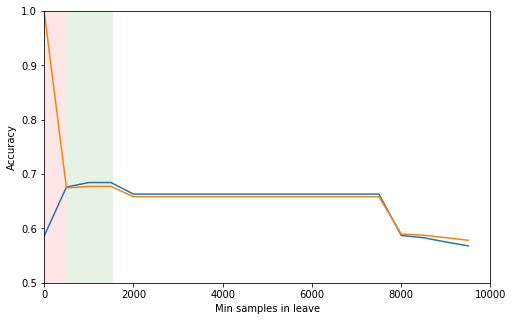

In [81]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics

r = np.arange(1, 10000, 500)
a = []
b = []

print(x_test.shape, x_train.shape, y_test.shape, y_train.shape)

for i in r:
    clf = tree.DecisionTreeClassifier(min_samples_leaf=i, class_weight='balanced')
    clf = clf.fit(x_train, y_train)
    a.append(clf.score(x_test, y_test))
    b.append(clf.score(x_train,y_train))
    
plt.figure(figsize=(8,5))
plt.plot(r, a)
plt.plot(r, b)

plt.axvspan(0, 500, color='r', alpha=0.1, lw=0)
plt.axvspan(500, 1550, color='g', alpha=0.1, lw=0)

plt.xlim(0,10000)
plt.ylim(0.5,1)
plt.xlabel('Min samples in leave')
plt.ylabel('Accuracy')
plt.show()

Note: the orange line represents performance on the training set and the blue on the testing set. For small number of samples in each leaf (high complexity), the model performs well on the training set and poorly on the testing set. This indicates overfitting.

It appears the sweetspot is somewhere between 500 and 1500 samples in each leaf (green area).

### K-fold cross-validation
We'll use 10-fold cross-validation in the area of 250 to 5000 minimum leaf samples value to pick an exact value for use for our model. We'll find the mean accuracy and variance of each cross-validation run.

In [82]:
r = np.arange(250, 5000, 250)
r

array([ 250,  500,  750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750,
       3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750])

We'll use the f1 score to evaluate the models.

In [84]:
scores = []
for i in r:
    clf = tree.DecisionTreeClassifier(min_samples_leaf=i, class_weight='balanced')
    m = model_selection.cross_val_score(clf, x_train, y_train, cv=10, scoring='f1')
    scores.append((i, m.mean(), m.var()))
scores

[(250, 0.57888542264288, 0.00012924004054687242),
 (500, 0.5675234965961993, 0.0001294741931279624),
 (750, 0.5662620527612052, 0.00011715447871949593),
 (1000, 0.5656930577026469, 9.243298974971064e-05),
 (1250, 0.5656930577026469, 9.243298974971064e-05),
 (1500, 0.5656930577026469, 9.243298974971064e-05),
 (1750, 0.5876396201935501, 6.334844520715226e-05),
 (2000, 0.5876396201935501, 6.334844520715226e-05),
 (2250, 0.5876396201935501, 6.334844520715226e-05),
 (2500, 0.5876396201935501, 6.334844520715226e-05),
 (2750, 0.5876396201935501, 6.334844520715226e-05),
 (3000, 0.5876396201935501, 6.334844520715226e-05),
 (3250, 0.5876396201935501, 6.334844520715226e-05),
 (3500, 0.5876396201935501, 6.334844520715226e-05),
 (3750, 0.5876396201935501, 6.334844520715226e-05),
 (4000, 0.5876396201935501, 6.334844520715226e-05),
 (4250, 0.5876396201935501, 6.334844520715226e-05),
 (4500, 0.5876396201935501, 6.334844520715226e-05),
 (4750, 0.5876396201935501, 6.334844520715226e-05)]

### Model and visualization
The minimum nnumber of 1750 sampes maximizes accuracy and f1. We'll train a decision tree with this value.

In [85]:
clf = tree.DecisionTreeClassifier(
    criterion='entropy', min_samples_leaf=1750, class_weight='balanced')
clf = clf.fit(x_train, y_train)

Let's visualize the decision tree model. Blue signifies scored shot prediction and orange represents a missed shot prediction. Lower entropy (corresponding to higher purity) is represented with darker colors.

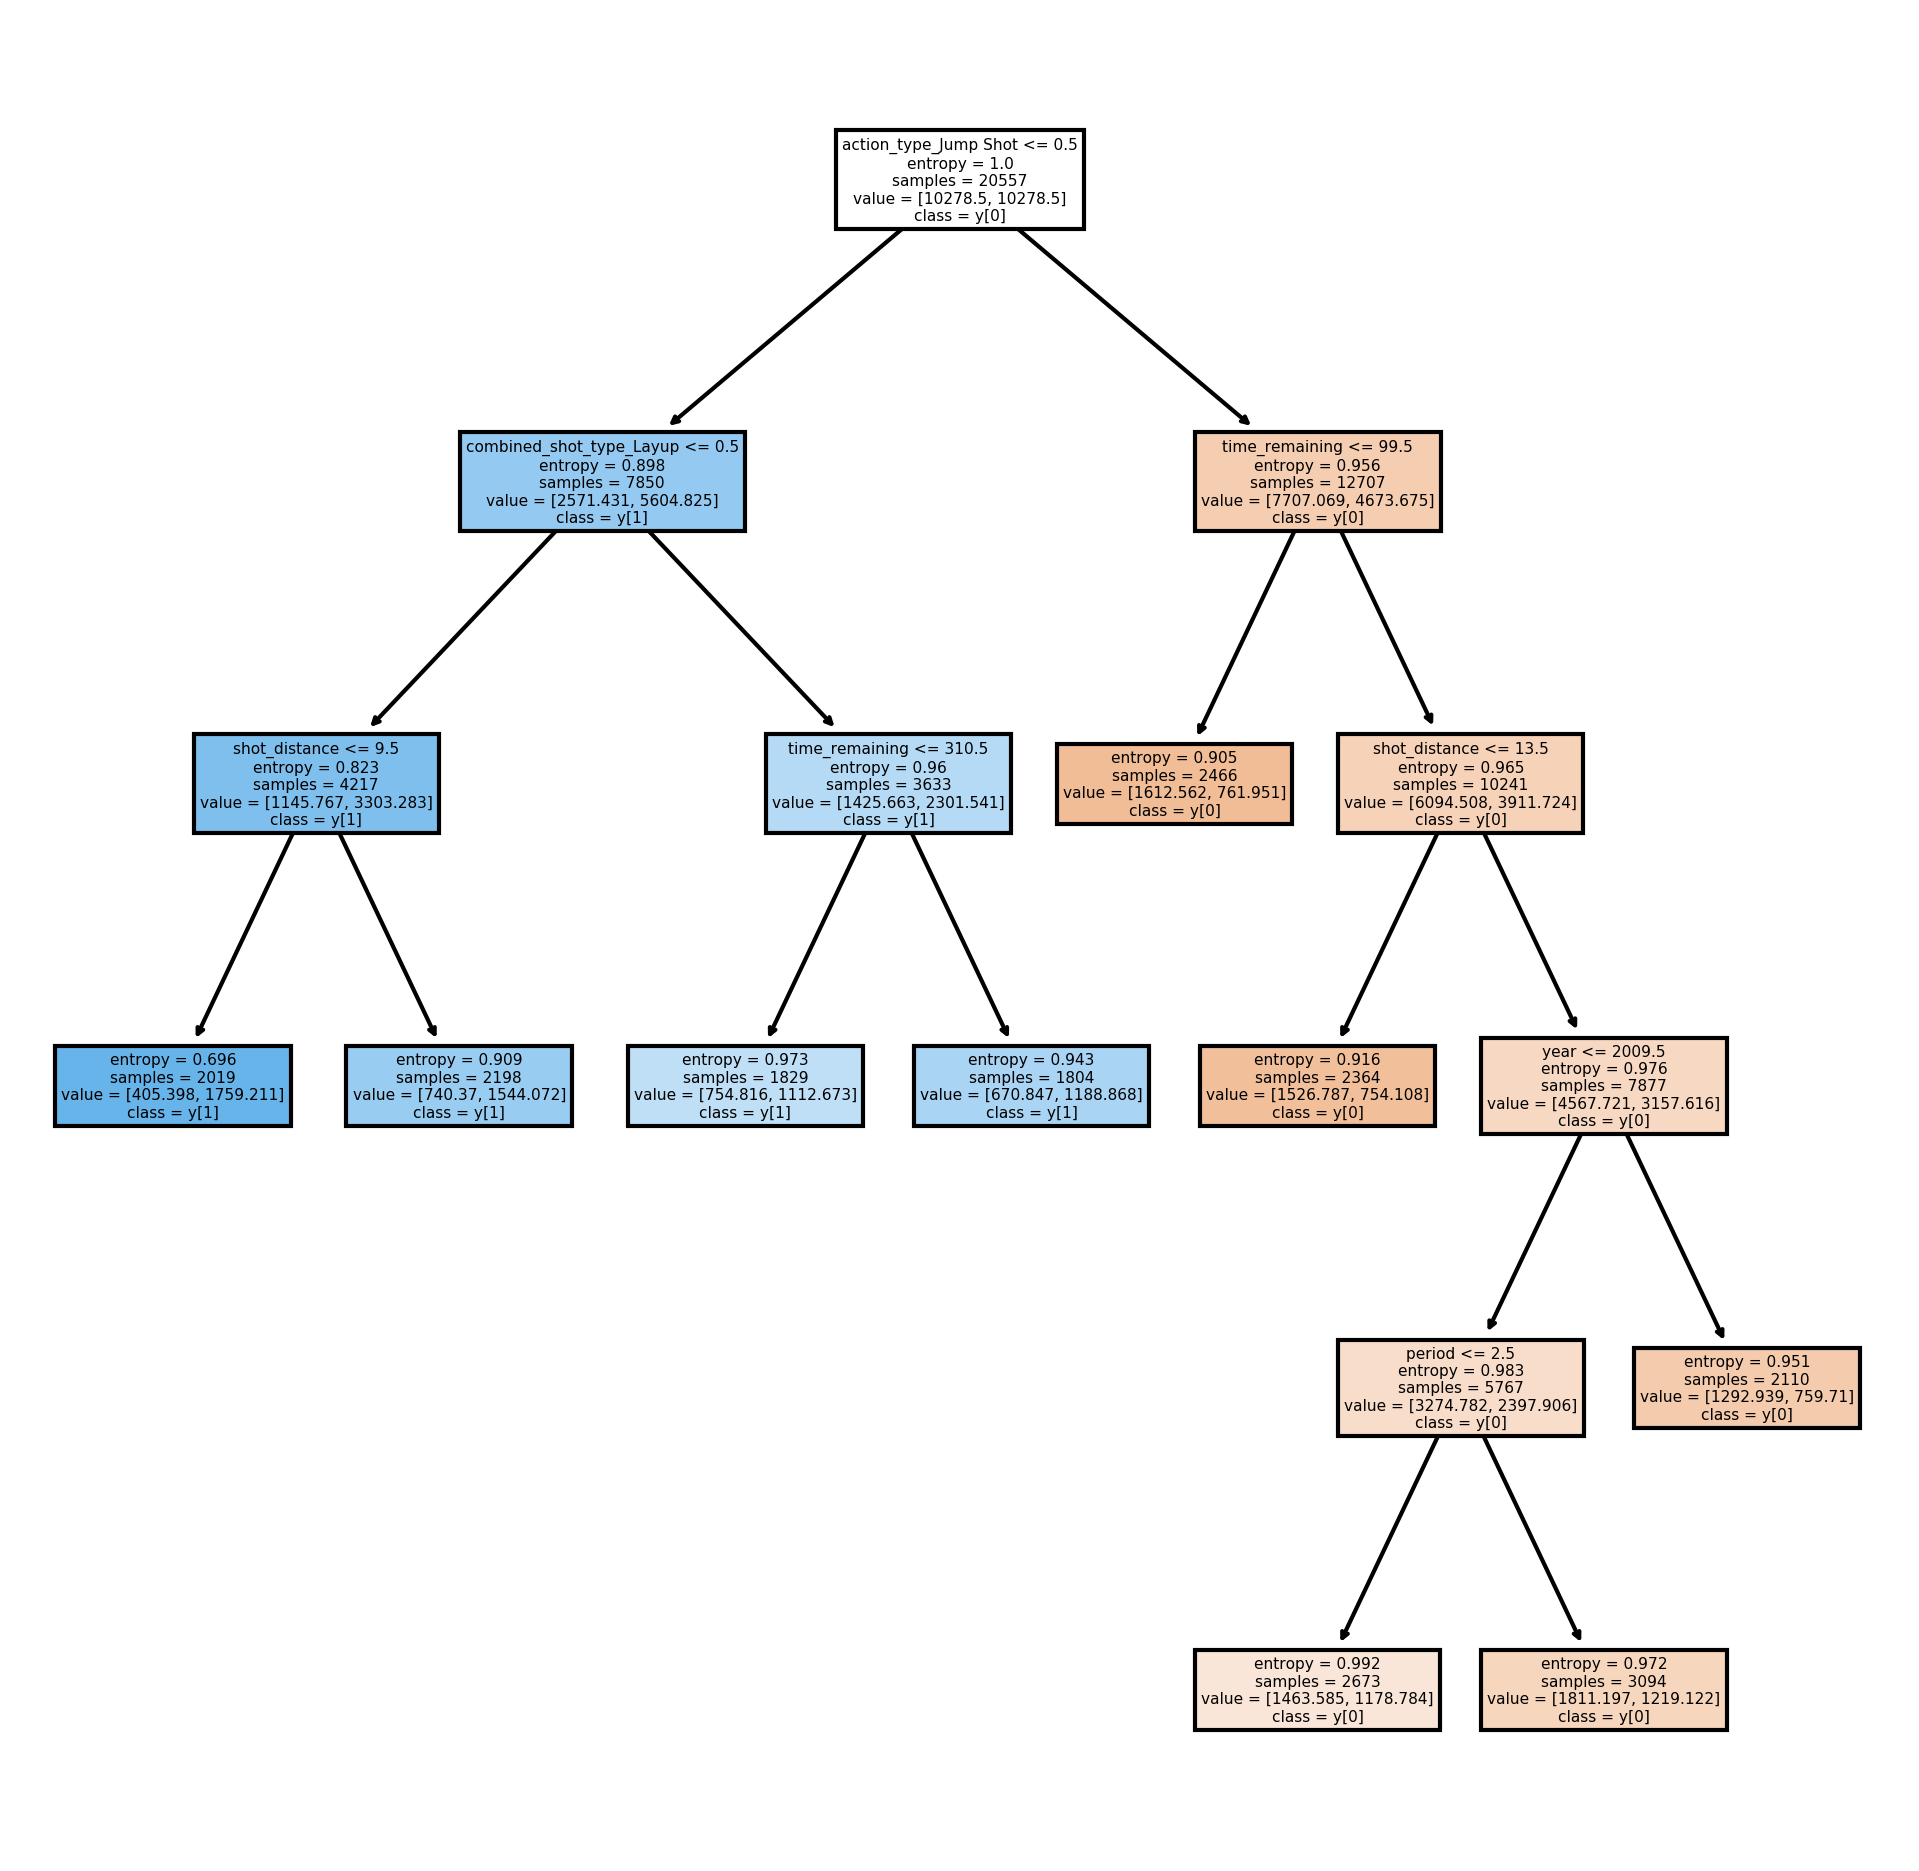

In [101]:
fn=x_train.columns
cn=True
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('tree.png')

Note that the tree is rooted at *action_type* jump shot. Shot distance and season (year) also appear high in the model. Time remaining does not appear to be a good predicitive feature. 

### Model evaluation
Let's calculate the tree's accuracy.

In [102]:
y_predict = clf.predict(x_test)
y_predict.shape

(5140,)

In [103]:
metrics.accuracy_score(y_test, y_predict, normalize=True)

0.6632295719844358

In [104]:
no = np.where(y_test == 0)[0].size
yes = np.where(y_test ==1)[0].size
print(no,yes)

2848 2292


In [105]:
from __future__ import division
no/(no+yes)

0.5540856031128405

We've found our decision tree to be predictive with an accuracy of approximately 66%, which is a significant improvement over the baseline majority classifier which has an accuracy of 55%. 